
# Data’re coming from :
# [Apple Quality - Explore the World of Fruits](https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality?resource=download)

In [463]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [573]:
df = pd.read_csv("../data/apple_quality.csv")
# Drop Credits
df.drop([4000],axis=0, inplace=True)
df["Acidity"] = df["Acidity"].astype(float)
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [574]:
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [575]:
#df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 281.4+ KB


In [576]:
X, y = df.iloc[:, 1:-1], df[["Quality"]]
X.shape, y.shape

((4000, 7), (4000, 1))

In [577]:
# Classes are balanced
y.value_counts()

Quality
good       2004
bad        1996
Name: count, dtype: int64

In [469]:
# Liste des catégories suivant ou non une loi normale pour les targets 0.
normality_test_0 = stats.normaltest(X.loc[y["Quality"] == "bad"], axis=0)
for it, pvalue in enumerate(list(normality_test_0.pvalue)):
    if pvalue < 0.05:
        print(X.columns[it] + " -> Normal distribution" )
    else:
        print(X.columns[it] + " -> Not Normal distribution" )


Size -> Not Normal distribution
Weight -> Not Normal distribution
Sweetness -> Not Normal distribution
Crunchiness -> Normal distribution
Juiciness -> Not Normal distribution
Ripeness -> Not Normal distribution
Acidity -> Normal distribution


In [470]:
# Liste des catégories suivant ou non une loi normale pour les targets 1.
normality_test_1 = stats.normaltest(X.loc[y["Quality"] == "good"], axis=0)
cols_norm = []
cols_not_norm = []
for it, pvalue in enumerate(list(normality_test_1.pvalue)):
    if pvalue < 0.05:
        print(X.columns[it] + " -> Normal distribution" )
    else:
        print(X.columns[it] + " -> Not Normal distribution" )


Size -> Normal distribution
Weight -> Not Normal distribution
Sweetness -> Normal distribution
Crunchiness -> Normal distribution
Juiciness -> Not Normal distribution
Ripeness -> Not Normal distribution
Acidity -> Not Normal distribution


In [471]:
# Les catégories suivant pas une loi normale
arrays_0 = []
arrays_1 = []
for it, col in enumerate(["Crunchiness"]):
    arrays_0.append(np.array(X.iloc[:,it].loc[y["Quality"]=="bad"].values.flatten()))
    arrays_1.append(np.array(X.iloc[:,it].loc[y["Quality"]=="good"].values.flatten()))
    # La variance de la variable Crunchiness est la même dans les 2 groupes
    bartlett_test = stats.bartlett(*arrays_0, *arrays_1)
    print(col, " : ", bartlett_test.pvalue)

Crunchiness  :  4.523689796590748e-07


In [472]:
# Le poids et le croquant sont indépendants
pvalues = []
for col in ["Crunchiness"]:
    test = stats.ttest_ind(np.array(X[[col]].loc[y["Quality"]=="bad"].values.flatten()), np.array(X[[col]].loc[y["Quality"]=="good"][:1996].values.flatten()))
    pvalues.append(test.pvalue)
    if test.pvalue <= 0.05:
        print(col, " \t\t-> H1 accepted, H0 rejected")
    else:
        print(col, " \t\t-> H1 rejected, H0 accepted")
# Crunchness n’a pas de différence de moyenne entre les bonnes et les mauvaises pommes

Crunchiness  		-> H1 rejected, H0 accepted


In [473]:
# Les catégories ne suivant pas une loi normale
arrays_0 = []
arrays_1 = []
cols = ["Size", "Weight", "Sweetness", "Juiciness", "Ripeness", "Acidity"]
for it, col in enumerate(cols):
    arrays_0.append(np.array(X.iloc[:,it].loc[y["Quality"]=="bad"].values.flatten()))
    arrays_1.append(np.array(X.iloc[:,it].loc[y["Quality"]=="good"].values.flatten()))
    # La variance de la variable est la même dans tous les couples de catégorie
    levene_test = stats.levene(*arrays_0, *arrays_1)
    print(col, " : ", levene_test.pvalue)

Size  :  6.250011355943806e-07
Weight  :  5.044514482336389e-65
Sweetness  :  3.097018435451572e-67
Juiciness  :  7.071115108911903e-156
Ripeness  :  1.556389012626723e-177
Acidity  :  1.0426285463322888e-180


In [474]:
# Le poids et le croquant sont indépendants
pvalues = []
for col in cols:
    test = stats.wilcoxon(np.array(X[[col]].loc[y["Quality"]=="bad"].values.flatten()), np.array(X[[col]].loc[y["Quality"]=="good"][:1996].values.flatten()))
    pvalues.append(test.pvalue)
    if test.pvalue <= 0.05:
        print(col, " \t\t-> H1 accepted, H0 rejected")
    else:
        print(col, " \t\t-> H1 rejected, H0 accepted")
    # Weight et Acidity n’ont pas de différence de moyenne entre bonne et mauvaise pomme
    # Size, Sweetness, Juiciness et Ripeness ont une différence de moyenne entre bonne et mauvaise pomme.

Size  		-> H1 accepted, H0 rejected
Weight  		-> H1 rejected, H0 accepted
Sweetness  		-> H1 accepted, H0 rejected
Juiciness  		-> H1 accepted, H0 rejected
Ripeness  		-> H1 accepted, H0 rejected
Acidity  		-> H1 rejected, H0 accepted


In [475]:
cols = ["Size", "Sweetness", "Juiciness", "Ripeness"]

test = stats.f_oneway(np.array(X[cols].loc[y["Quality"]=="bad"].values.flatten()), np.array(X[cols].loc[y["Quality"]=="good"].values.flatten()))
pvalues.append(test.pvalue)
if test.pvalue <= 0.05:
    print(test.pvalue)
    print(*cols, " \t\t-> H1 accepted, H0 rejected")
else:
    print(*cols, " \t\t-> H1 rejected, H0 accepted")
# One-way ANOVA montre que les groupes ont bien des moyennes différentes entre bonne et mauvaise pomme.

7.290456021457005e-54
Size Sweetness Juiciness Ripeness  		-> H1 accepted, H0 rejected


In [476]:
# Variance Inflation Factor
import itertools
from statsmodels.stats import outliers_influence
from sklearn import preprocessing
inp_list = ["Size", "Weight", "Sweetness", "Juiciness", "Ripeness", "Acidity", "Crunchiness"]
perms = list(itertools.combinations(inp_list, r=2))
score = []
for perm in perms:
    scaler = preprocessing.MinMaxScaler()
    X_scaled = scaler.fit(X[[perm[0], perm[1]]])
    test = outliers_influence.variance_inflation_factor(np.array(scaler.transform(X[[perm[0], perm[1]]])), 0)
    if test >= 5:
        print(perm[0], perm[1], " \t\t sont hautement colinéaire", test)
        score.append(test)
    else:
        print(perm[0], perm[1], " \t\t ne sont pas colinéaire", test)
        score.append(test)
        
print("VIF Maximum :", max(score))
# Il y a les champs Size Crunchiness, Acidiy Crunchiness et Weight Crunchiness qui sont hautement colinéaires

Size Weight  		 sont hautement colinéaire 6.32478341851282
Size Sweetness  		 ne sont pas colinéaire 4.9424278171558145
Size Juiciness  		 sont hautement colinéaire 6.4263089213729145
Size Ripeness  		 sont hautement colinéaire 5.860846185430847
Size Acidity  		 sont hautement colinéaire 8.083581379741336
Size Crunchiness  		 sont hautement colinéaire 10.496693199225037
Weight Sweetness  		 sont hautement colinéaire 6.150611564895419
Weight Juiciness  		 sont hautement colinéaire 6.575477088653783
Weight Ripeness  		 sont hautement colinéaire 5.880970451588347
Weight Acidity  		 sont hautement colinéaire 7.276183084446681
Weight Crunchiness  		 sont hautement colinéaire 9.255104253670117
Sweetness Juiciness  		 sont hautement colinéaire 6.9446093309337735
Sweetness Ripeness  		 sont hautement colinéaire 5.060694975452608
Sweetness Acidity  		 sont hautement colinéaire 6.88066313085828
Sweetness Crunchiness  		 sont hautement colinéaire 8.144301626162742
Juiciness Ripeness  		 sont haut

In [477]:
scaler = preprocessing.MinMaxScaler().fit(X[["Size", "Acidity", "Crunchiness", "Weight"]])
X_ = pd.DataFrame(scaler.transform(X[["Size", "Acidity", "Crunchiness", "Weight"]].copy())).rename(columns={0:"Size", 1:"Acidity", 2:"Crunchiness", 3:"Weight"})
scaler = preprocessing.MinMaxScaler().fit(X[["Sweetness", "Juiciness", "Ripeness"]])
X_sel = pd.DataFrame(scaler.transform(X[["Sweetness", "Juiciness", "Ripeness"]].copy())).rename(columns={0:"Sweetness", 1:"Juiciness", 2:"Ripeness"})
X_sel["Sz_Ac_Cr"] = X_[["Size"]].mul(X_[["Size"]]).rename(columns={"Size": "Acidity"}, inplace=False).add(X_[["Acidity"]], axis="columns").rename(columns={"Acidity":"Crunchiness"}, inplace=False).add(X_[["Crunchiness"]].mul(X_[["Crunchiness"]]), axis="columns")
X_sel["Wg_Ac_Cr"] = X_[["Weight"]].mul(X_[["Weight"]]).rename(columns={"Weight": "Acidity"}, inplace=False).add(X_[["Acidity"]], axis="columns").rename(columns={"Acidity":"Crunchiness"}, inplace=False).add(X_[["Crunchiness"]].mul(X_[["Crunchiness"]]), axis="columns")

In [478]:
#cols = ["Sweetness", "Juiciness", "Ripeness", "Sz_Ac_Cr", "Wg_Ac_Cr"]

In [479]:
# PCA
# Scree Plot

In [480]:
# Data Scaling
x_scaled = preprocessing.MinMaxScaler().fit_transform(X[cols])

# Reduce from 4 to 3 features with PCA
pca = PCA(n_components=4)

# Fit and transform data
pca_features = pca.fit_transform(x_scaled)

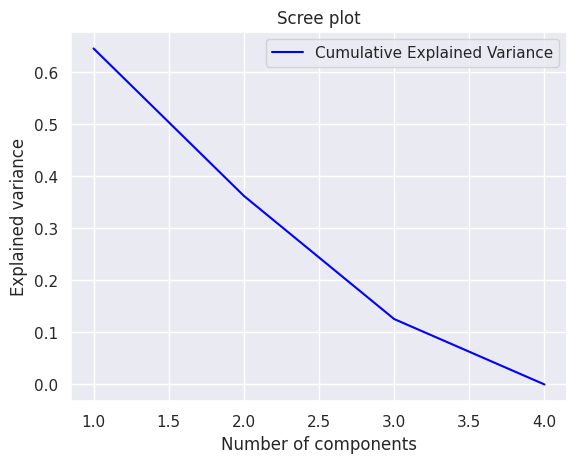

In [481]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.plot(
    range(1,len(pca.explained_variance_ratio_ )+1),
    np.sum(pca.explained_variance_ratio_) - np.cumsum(pca.explained_variance_ratio_),
    c='blue',
    label='Cumulative Explained Variance')

plt.legend(loc='upper right')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('Scree plot')

plt.show()

In [482]:
# Transform categorical to binary class
y = pd.get_dummies(y).drop("Quality_bad", axis=1).rename(columns={"Quality_good":"Quality"})

In [483]:
cols

['Size', 'Sweetness', 'Juiciness', 'Ripeness']

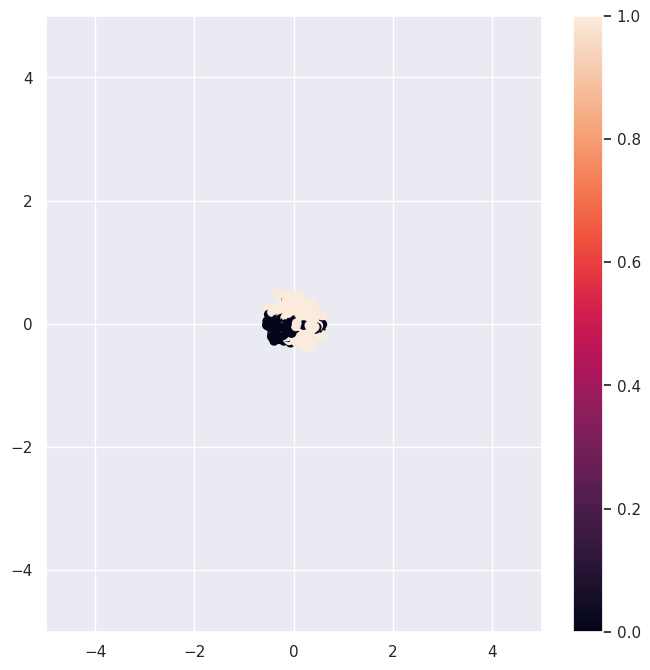

In [484]:
X_projected = pca.transform(x_scaled)
figure = plt.figure(figsize=(8, 8))
# afficher chaque observation
plt.scatter(X_projected[:, 0], X_projected[:, 3], # Weight by Crunchiness
            c=y.get("Quality"))

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.colorbar()

In [485]:
def acp_graph(pca, comp_x, comp_y, X):
    pcs = pca.components_
    figure = plt.figure(figsize=(8, 8))

    for i, (x, y) in enumerate(zip(pcs[comp_x, :], pcs[comp_y, :])):
        # Afficher un segment de l'origine au point (x, y)
        plt.plot([0, x], [0, y], color='k', )
        # Afficher le nom (data.columns[i]) de la performance
        plt.text(x, y, cols[i], fontsize='11')

    # Afficher une ligne horizontale y=0
    plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

    # Afficher une ligne verticale x=0
    plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

    plt.xlim(-0.75, 0.75)
    plt.ylim(-0.75, 0.75)

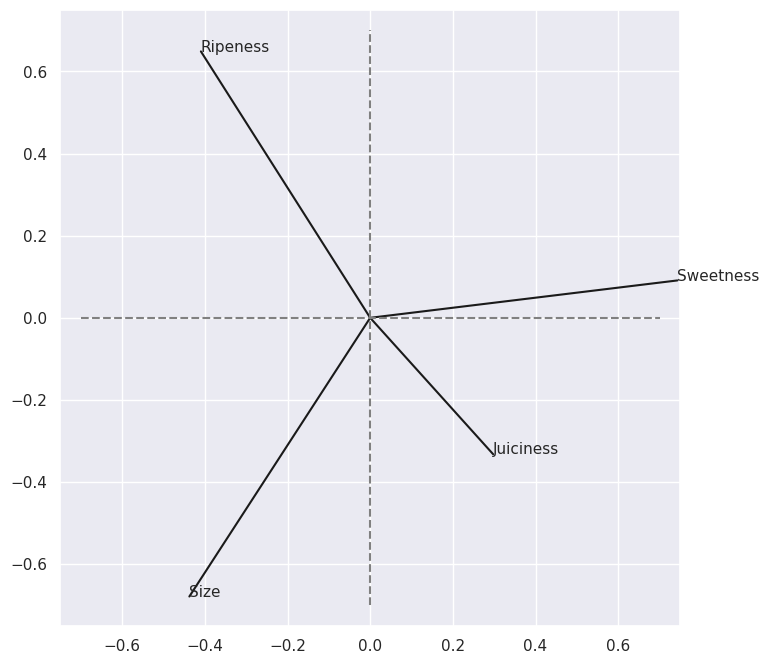

In [486]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(x_scaled)
acp_graph(pca, 0, 1, X)

Nous voyons que les variables, à l’exception du Juiciness sont proches du cercle de corrélation et donc très bien représentées sur le mapping.

Le premier axe représente bien la Sweetness.

Les deux axes représentent le Ripeness et la Size et Juiciness dans une moindre mesure.

La Size est perpendiculaire, donc indépendante de Ripeness et Juiciness, sur le mapping.

In [487]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y.to_numpy().ravel(), random_state=42)
models = {"GradientBoosting": GradientBoostingClassifier(),
          "HistGradientBoosting": HistGradientBoostingClassifier(),
          "Bagging(DecisionTree)": BaggingClassifier(DecisionTreeClassifier()),
          "RandomForest": RandomForestClassifier()}
for val, mod in models.items():
    mod.fit(X_train, y_train)
    print(val, " -> " ,mod.score(X_test, y_test))

GradientBoosting  ->  0.871
HistGradientBoosting  ->  0.903
Bagging(DecisionTree)  ->  0.872
RandomForest  ->  0.892


In [488]:
from sklearn.datasets import make_classification

from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pandas as pd
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

estimators = [('reduce_dim', PCA()), ('clf', HistGradientBoostingClassifier(random_state=42))]
cachedir = mkdtemp()
pipe = Pipeline(estimators, memory=cachedir)
pipe.set_params()
# Clear the cache directory when you don't need it anymore
rmtree(cachedir)
param_grid = {'reduce_dim__n_components': [6, 7],
              'clf__learning_rate': [0.01, 0.1, 0.5],
              'clf__l2_regularization' : [0.3, 0.7],
              'clf__max_depth': [5, 10, 100],
              'clf__min_samples_leaf': [20, 60, 125],
              'clf__max_features': [0.1, 0.5, 1.0],
              'clf__random_state': [42],
              }
#X, y = make_classification(n_samples=1000, random_state=0)
clf = RandomizedSearchCV(pipe, param_grid, cv=5,
                         scoring=["recall"],refit="recall").fit(X_train, y_train)
clf.best_estimator_

Pipeline(memory='/tmp/tmpn93d35hi',
         steps=[('reduce_dim', PCA(n_components=7)),
                ('clf',
                 HistGradientBoostingClassifier(l2_regularization=0.3,
                                                learning_rate=0.5,
                                                max_depth=100, max_features=0.1,
                                                random_state=42))])

In [489]:
clf.best_params_

{'reduce_dim__n_components': 7,
 'clf__random_state': 42,
 'clf__min_samples_leaf': 20,
 'clf__max_features': 0.1,
 'clf__max_depth': 100,
 'clf__learning_rate': 0.5,
 'clf__l2_regularization': 0.3}

In [490]:
clf.score(X_test, y_test)
# Le score sur des données d’entraînement
# montre que les données ont été apprises

0.8871287128712871

In [491]:
# Comparaison du Modèle de base et du Modèle avec les hyperparamètres
model_default = Pipeline([('reduce_dim', PCA()), ('clf', HistGradientBoostingClassifier())])
model_default.fit(X_train, y_train)
model = Pipeline([('reduce_dim', PCA()), ('clf', HistGradientBoostingClassifier(l2_regularization=0.3, 
                                                                                max_depth=100, 
                                                                                min_samples_leaf=60, 
                                                                                max_features=1.0, 
                                                                                learning_rate=0.1,
                                                                            random_state=42))])
model.fit(X_train, y_train)


Pipeline(steps=[('reduce_dim', PCA()),
                ('clf',
                 HistGradientBoostingClassifier(l2_regularization=0.3,
                                                max_depth=100,
                                                min_samples_leaf=60,
                                                random_state=42))])

In [492]:
model_default.score(X_test, y_test), model.score(X_test, y_test)
# Le modèle avec les hyperparamètres est plus exacte

(0.903, 0.904)

In [493]:
# Le modèle marche mieux que pour le modèle par défaut, mais un GridSearch pourrait être utile.

In [494]:
# Test d’un modèle par vote sur l’ensemble des algorithmes
# Les hyperparamètres du gradient boosting ont été évalués
# par Cross Validation
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import VotingClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y.to_numpy().ravel(), random_state=42)
clf_1 = RandomForestClassifier(n_estimators=450)
clf_2 = tree.DecisionTreeClassifier()
clf_3 = GradientBoostingClassifier(learning_rate=0.75, max_depth=100,
                           min_samples_leaf=0.125, min_samples_split=9,
                           min_weight_fraction_leaf=0.125, random_state=42)
clf_4 = HistGradientBoostingClassifier(l2_regularization=0.3, 
                                        max_depth=5, 
                                        min_samples_leaf=60, 
                                        max_features=0.5, 
                                        learning_rate=0.5,
                                        random_state=42)
elf = VotingClassifier(
     estimators=[('rf', clf_1), ('dt', clf_2), ('gbc', clf_3), ('hbc', clf_4)],n_jobs=-1,
     voting='hard')
elf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=450)),
                             ('dt', DecisionTreeClassifier()),
                             ('gbc',
                              GradientBoostingClassifier(learning_rate=0.75,
                                                         max_depth=100,
                                                         min_samples_leaf=0.125,
                                                         min_samples_split=9,
                                                         min_weight_fraction_leaf=0.125,
                                                         random_state=42)),
                             ('hbc',
                              HistGradientBoostingClassifier(l2_regularization=0.3,
                                                             learning_rate=0.5,
                                                             max_depth=5,
                                                             max_features=0.5,
                                                             min_samples_leaf=60,
                                                             random_state=42))],
                 n_jobs=-1)

In [495]:
elf.score(X_test, y_test)
# Le modèle performe moins bien que HistGradientBoostingClassifier

0.893

## Évaluation du modèle

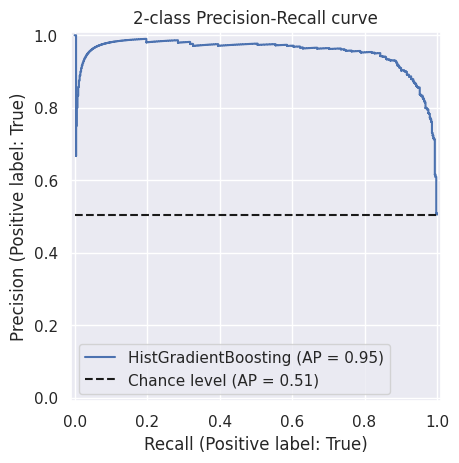

In [496]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    model, X_test, y_test, name="HistGradientBoosting", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

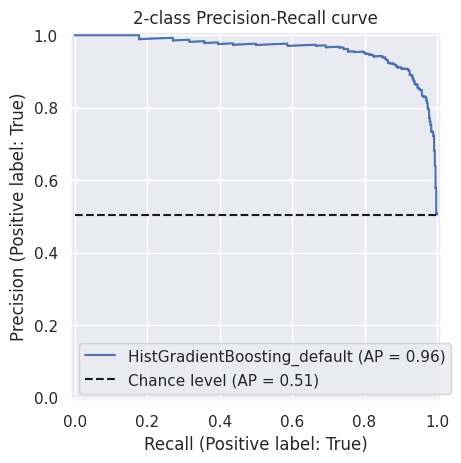

In [497]:

display = PrecisionRecallDisplay.from_estimator(
    model_default, X_test, y_test, name="HistGradientBoosting_default", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")


In [498]:
from sklearn.metrics import class_likelihood_ratios
print(class_likelihood_ratios(y_test, model_default.predict(X_test)))
print(class_likelihood_ratios(y_test, model.predict(X_test)))

(10.069306930693068, 0.11518956773726154)
(10.091584158415841, 0.11301617966674717)


<Axes: >

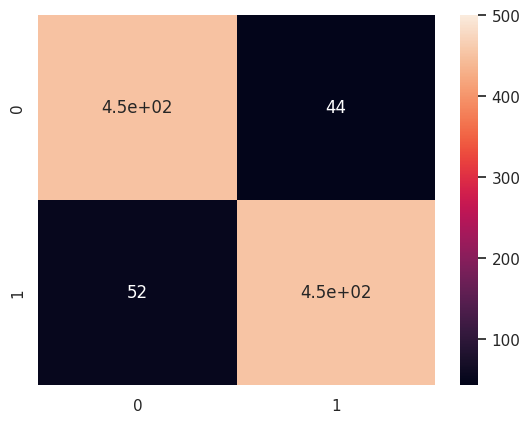

In [499]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
df_cm = confusion_matrix(y_test, model.predict(X_test))
sns.heatmap(df_cm, annot=True, vmax = 500)

In [500]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, model.predict(X_test)), matthews_corrcoef(y_test, model_default.predict(X_test))


(0.8081149522305348, 0.8061461041111435)

In [501]:
from sklearn.metrics import top_k_accuracy_score
top_k_accuracy_score(y_test, model.predict(X_test), k=1, normalize=True)

0.904

In [502]:
from sklearn.metrics import recall_score
recall_score(y_test, model.predict(X_test), average=None)

array([0.91111111, 0.8970297 ])

In [503]:
from sklearn.metrics import precision_score
precision_score(y_test, model.predict(X_test), average='binary')

0.9114688128772636

In [504]:
from sklearn.metrics import zero_one_loss
zero_one_loss(y_test, model.predict(X_test), normalize=True)
# 9,5 % de mauvaise classification

0.09599999999999997

## Conclusion

Le modèle HistGradientBoostingClassifier montre de bons résultats. Les hyperparamètres trouvés aléatoirement sont meilleurs que
le modèle par défaut.
Toutefois, un réglage des hyperparamètres pourra être cherché par GridSearchCV et Data Version Control (DVC).

## Explainability of the model

In [505]:
import shap

In [506]:
model = HistGradientBoostingClassifier(l2_regularization=0.3, 
                                        max_depth=100, 
                                        min_samples_leaf=60, 
                                        max_features=0.5, 
                                        learning_rate=0.1,
                                        random_state=42)
model.fit(X_train, y_train)

HistGradientBoostingClassifier(l2_regularization=0.3, max_depth=100,
                               max_features=0.5, min_samples_leaf=60,
                               random_state=42)

In [507]:
pred = model.predict(X_test)

explainer = shap.TreeExplainer(model)
explanation = explainer(X_test)

shap_values = explanation.values
np.abs(shap_values.sum(axis=1) + explanation.base_values - pred).max()

7.321938043367841

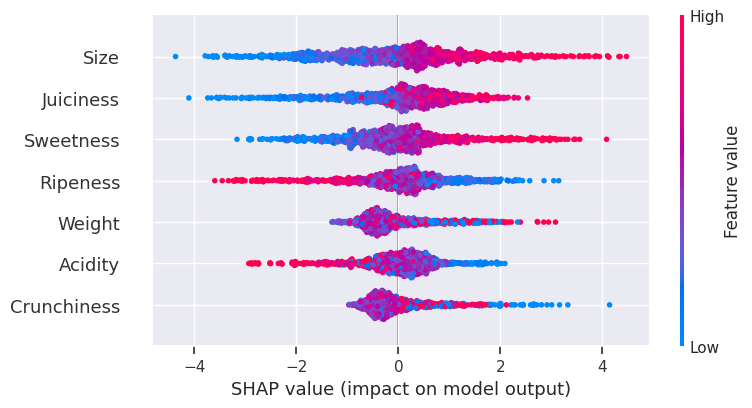

In [508]:
shap.plots.beeswarm(explanation)

In [509]:
from sklearn.inspection import permutation_importance
import time

start_time = time.time()
result = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
forest_importances = pd.Series(result.importances_mean, index=X_test.columns)

Elapsed time to compute the importances: 1.469 seconds


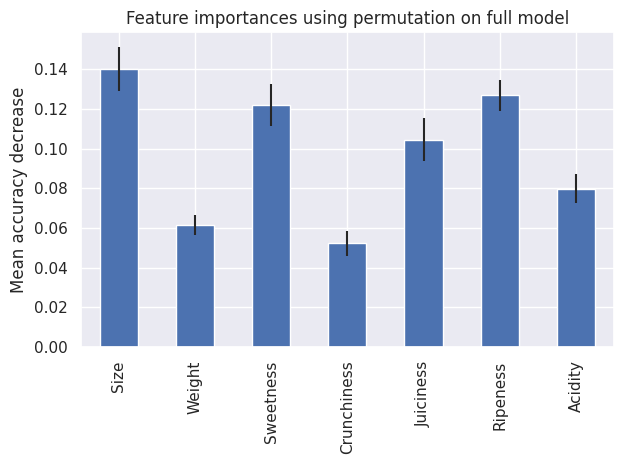

In [510]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [511]:
def plot_permutation_importance(clf, X, y, ax):
    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42, n_jobs=2)
    perm_sorted_idx = result.importances_mean.argsort()

    ax.boxplot(
        result.importances[perm_sorted_idx].T,
        vert=False,
        labels=X.columns[perm_sorted_idx],
    )
    ax.axvline(x=0, color="k", linestyle="--")
    return ax

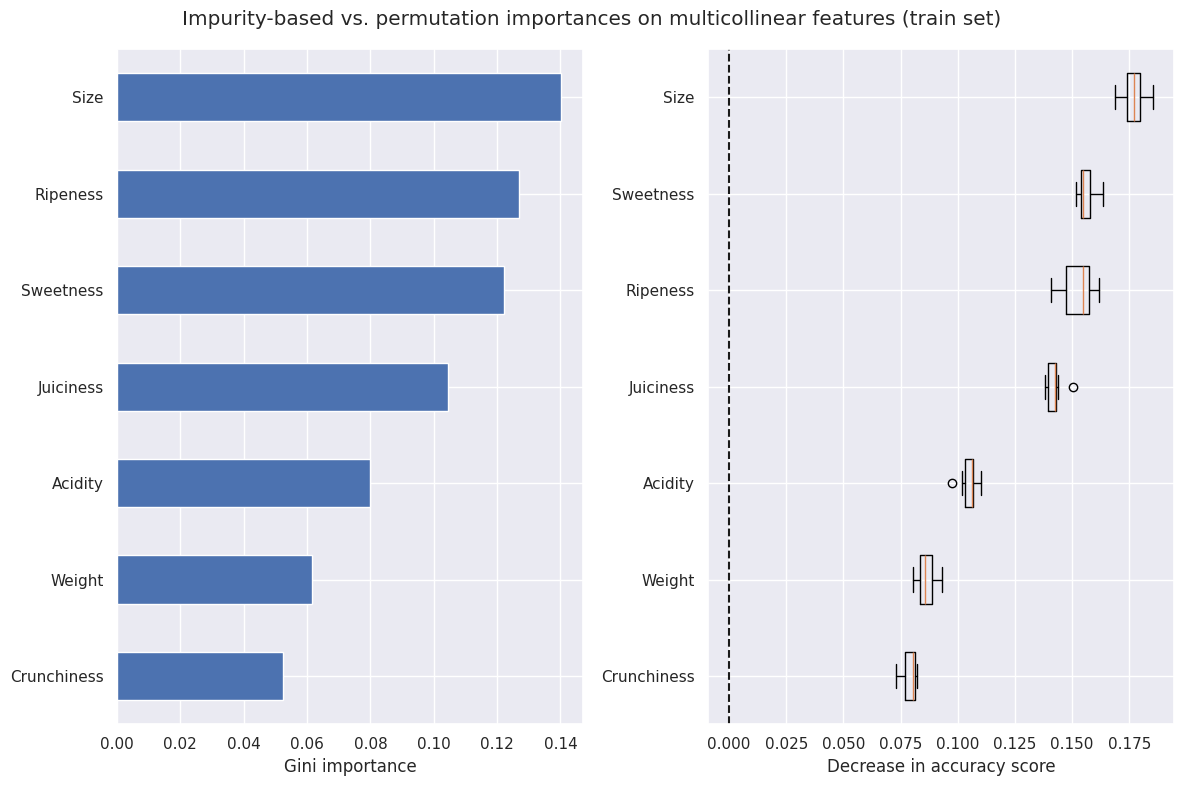

In [512]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

mdi_importances = pd.Series(forest_importances, index=X_train.columns)
tree_importance_sorted_idx = np.argsort(forest_importances)
tree_indices = np.arange(0, len(forest_importances)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
mdi_importances.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(model, X_train, y_train, ax2)
ax2.set_xlabel("Decrease in accuracy score")
fig.suptitle(
    "Impurity-based vs. permutation importances on multicollinear features (train set)"
)
_ = fig.tight_layout()

In [513]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

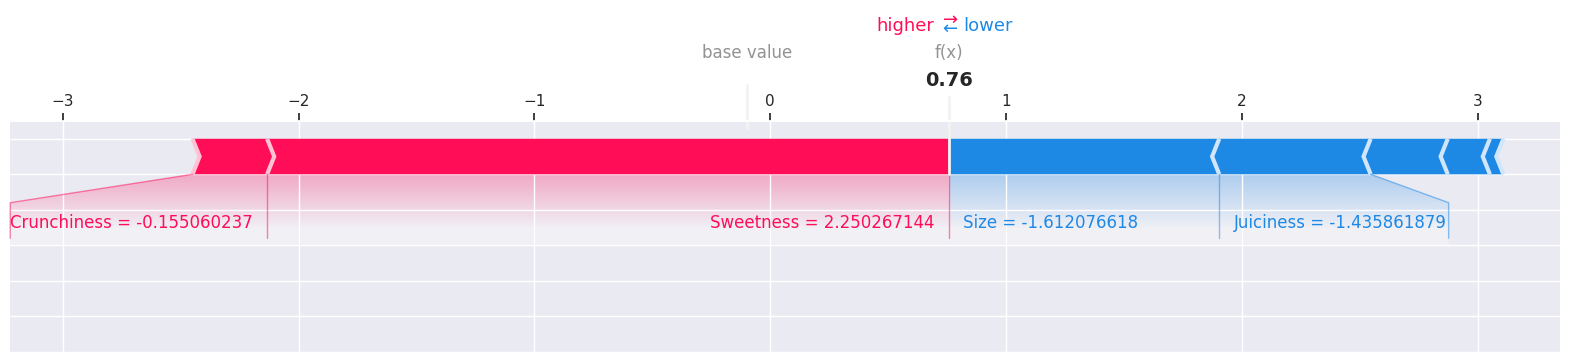

In [514]:
import matplotlib
shap.force_plot(explainer.expected_value, shap_values[3, :], X_test.iloc[3, :], matplotlib=matplotlib)

In [515]:
shap.force_plot(
    explainer.expected_value, shap_values[:1000, :], X_test.iloc[:1000, :]
)

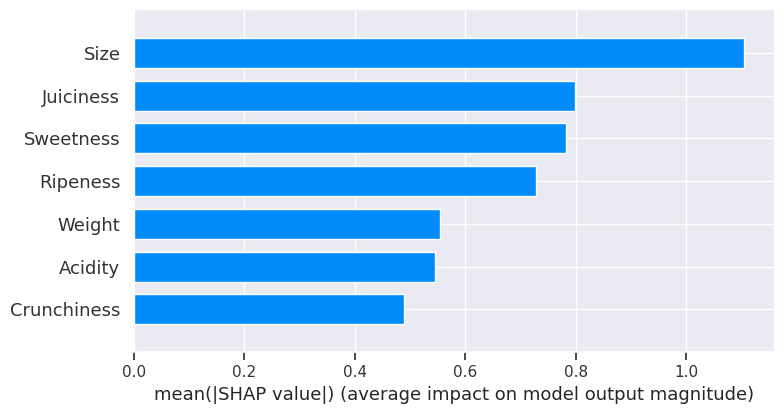

In [516]:
shap.summary_plot(shap_values, X_test, plot_type="bar")